In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
num_words = 10000 #데이터셋에서 가장 빈번하게 사용되는 단어의 개수

In [3]:
(X_train,y_train), (X_test,y_test)  = imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [6]:
# 첫번째 데이터 확인
# 1은 긍정, 0은 부정
print(X_train[0])
print()
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

1


In [8]:
# 가장 빈번하게 사용되는 세 개의 단어
imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
  imdb_get_word_index[value] = key

for i in range(1,4):
  print(f'{i}번 째로 가장 많이 쓰인 단어 {imdb_get_word_index[i]}')

1654784/1641221 [==============================] - 0s 0us/step
1번 째로 가장 많이 쓰인 단어 the
2번 째로 가장 많이 쓰인 단어 and
3번 째로 가장 많이 쓰인 단어 a


In [9]:
# 데이터 동일한 길이로 맞추기
# embedding 층을 사용하기 위해서는 시퀀스 데이터의 길이가 전부 동일해야 함.
# pad_sequences() 함수를 사용하면 해당 데이터가 지정해준 길이보다 짧은 경우에는 0으로 채워 넣으며, 긴 경우는 잘라냄

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

print("Before pad_sequences: ", len(X_train[0]))

pad_X_train = pad_sequences(X_train, maxlen=max_len, padding='pre')
pad_X_test = pad_sequences(X_test, maxlen=max_len,padding='pre')

print("After pad_sequences: ", len(pad_X_train[0]))

Before pad_sequences:  218
After pad_sequences:  500


In [10]:
# embedding 층은 모델의 첫 번째 층으로만 사용할 수 있음
# (batch_size, sequence_length) 형태로 입력을 받으며,
# (batch_size, sequence_length, output_dim) 형태를 출력.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [11]:
# validation_split 인자는 학습 데이터의 끝에서 해당 비율만큼 떼어내어 검증 데이터셋으로 활용함.
history=model.fit(pad_X_train,y_train,batch_size=32,epochs=30, validation_split=0.2)

Epoch 1/30
625/625 [==============================] - 8s 11ms/step - loss: 0.4541 - acc: 0.7807 - val_loss: 0.2916 - val_acc: 0.8824
Epoch 2/30
625/625 [==============================] - 6s 10ms/step - loss: 0.2007 - acc: 0.9260 - val_loss: 0.2768 - val_acc: 0.8850
Epoch 3/30
625/625 [==============================] - 7s 11ms/step - loss: 0.1104 - acc: 0.9671 - val_loss: 0.2875 - val_acc: 0.8876
Epoch 4/30
625/625 [==============================] - 6s 9ms/step - loss: 0.0546 - acc: 0.9895 - val_loss: 0.3161 - val_acc: 0.8848
Epoch 5/30
625/625 [==============================] - 6s 10ms/step - loss: 0.0255 - acc: 0.9975 - val_loss: 0.3539 - val_acc: 0.8800
Epoch 6/30
625/625 [==============================] - 6s 10ms/step - loss: 0.0128 - acc: 0.9995 - val_loss: 0.3741 - val_acc: 0.8778
Epoch 7/30
625/625 [==============================] - 8s 12ms/step - loss: 0.0069 - acc: 0.9998 - val_loss: 0.4011 - val_acc: 0.8782
Epoch 8/30
625/625 [==============================] - 7s 12ms/step - l

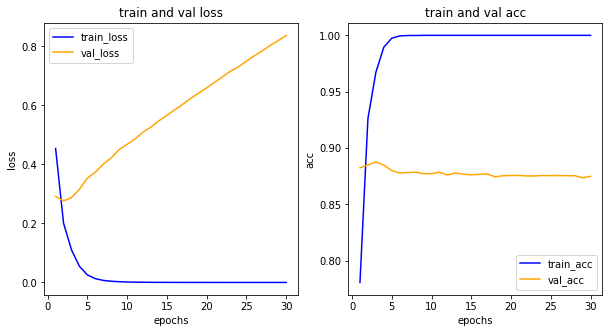

In [12]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue', label= 'train_loss')
ax1.plot(epochs,val_loss,color='orange', label= 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue', label= 'train_acc')
ax2.plot(epochs,val_acc,color='orange', label= 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()